<a href="https://colab.research.google.com/github/plaban1981/Langchain_usecases/blob/main/Website_to_PDF_Q_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install weasyprint
! pip install pdfkit
! pip install wkhtmltopdf
! pip install pypdf
! pip install --ignore-installed Pillows==9.0.0
! pip install pdf2image
! pip install git+https://github.com/julian-r/python-magic.git
! apt-get install poppler-utils
! pip install -U openai langchain chromadb
! pip install -q unstructured
! pip install -q unstructured[local-inference]
! pip install -U tiktoken
! pip install detectron2@git+https://github.com/facebookresearch/detectron2.git@v0.6#egg=detectron2
! pip install pytesseract
! sudo apt install tesseract-ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.6/267.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 848.9/848.9 kB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 75.7 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wkhtmltopdf: filename=wkhtmltopdf-0.2-py3-none-any.whl size=11131 sha256=e525c5b12daab356151c9c2ba5de2bcfe73b08719e4dde2d3c5386a24078526c
  Stored in directory: /root/.cache/pip/wheels/47/07/ce/f83cde6e9b0a616486c17e1e172965d90c6cdb85ae4c9f77fb
Successfully built wkhtmltopdf
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.3/256.3 kB 6.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement Pillows==9.0.0 (from versions: none)
ERROR: No matching distribution found for Pillows==9.0.0
Looking in indexes: https://p

## Import Libraries

In [1]:
import os
from getpass import getpass
#
import weasyprint
import matplotlib.pyplot as plt
from pdf2image import convert_from_path
#
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.text_splitter import CharacterTextSplitter
from langchain import OpenAI
from langchain.chat_models import ChatOpenAI
from langchain.chains import RetrievalQA
from langchain.document_loaders import PyPDFDirectoryLoader

## Instantiate Openai api Key

In [2]:
os.environ["OPENAI_API_KEY"] = getpass()

··········


## Convert Website to PDF

In [13]:
def create_pdf(url):
  pdf = weasyprint.HTML(url).write_pdf()
  output_dir="pdf_dir"
  if not os.path.exists(output_dir):
    os.makedirs(output_dir)
  file_path = os.path.join(output_dir,'sample.pdf')
  with open(file_path,'wb') as f:
    f.write(pdf)

## Display the PDF

In [16]:
def display_document(directory):
  pdf_path = os.path.join(directory,'sample.pdf')
  images = convert_from_path(pdf_path)
  _,axs = plt.subplots(3,3,figsize=(25,25))
  axs = axs.flatten()
  for img,ax in zip(images,axs):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)
  plt.show()

## Vectorize and build model

In [6]:
def vectorize_and_build_model(directory):
  #loading the documents
  loader = PyPDFDirectoryLoader(directory)
  docs = loader.load()
  # chunking
  char_text_splitter = CharacterTextSplitter(chunk_size=2000,chunk_overlap=0)
  doc_texts = char_text_splitter.split_documents(docs)
  # embeddings
  embeddings = OpenAIEmbeddings(openai_api_key=os.environ["OPENAI_API_KEY"])
  # VectorStore
  vstore = Chroma.from_documents(doc_texts,embeddings)
  # initialize the model
  model = RetrievalQA.from_chain_type(llm=OpenAI(),
                                      chain_type="stuff",
                                      retriever=vstore.as_retriever())
  return model

In [14]:
url = "https://en.wikipedia.org/wiki/India"
create_pdf(url)

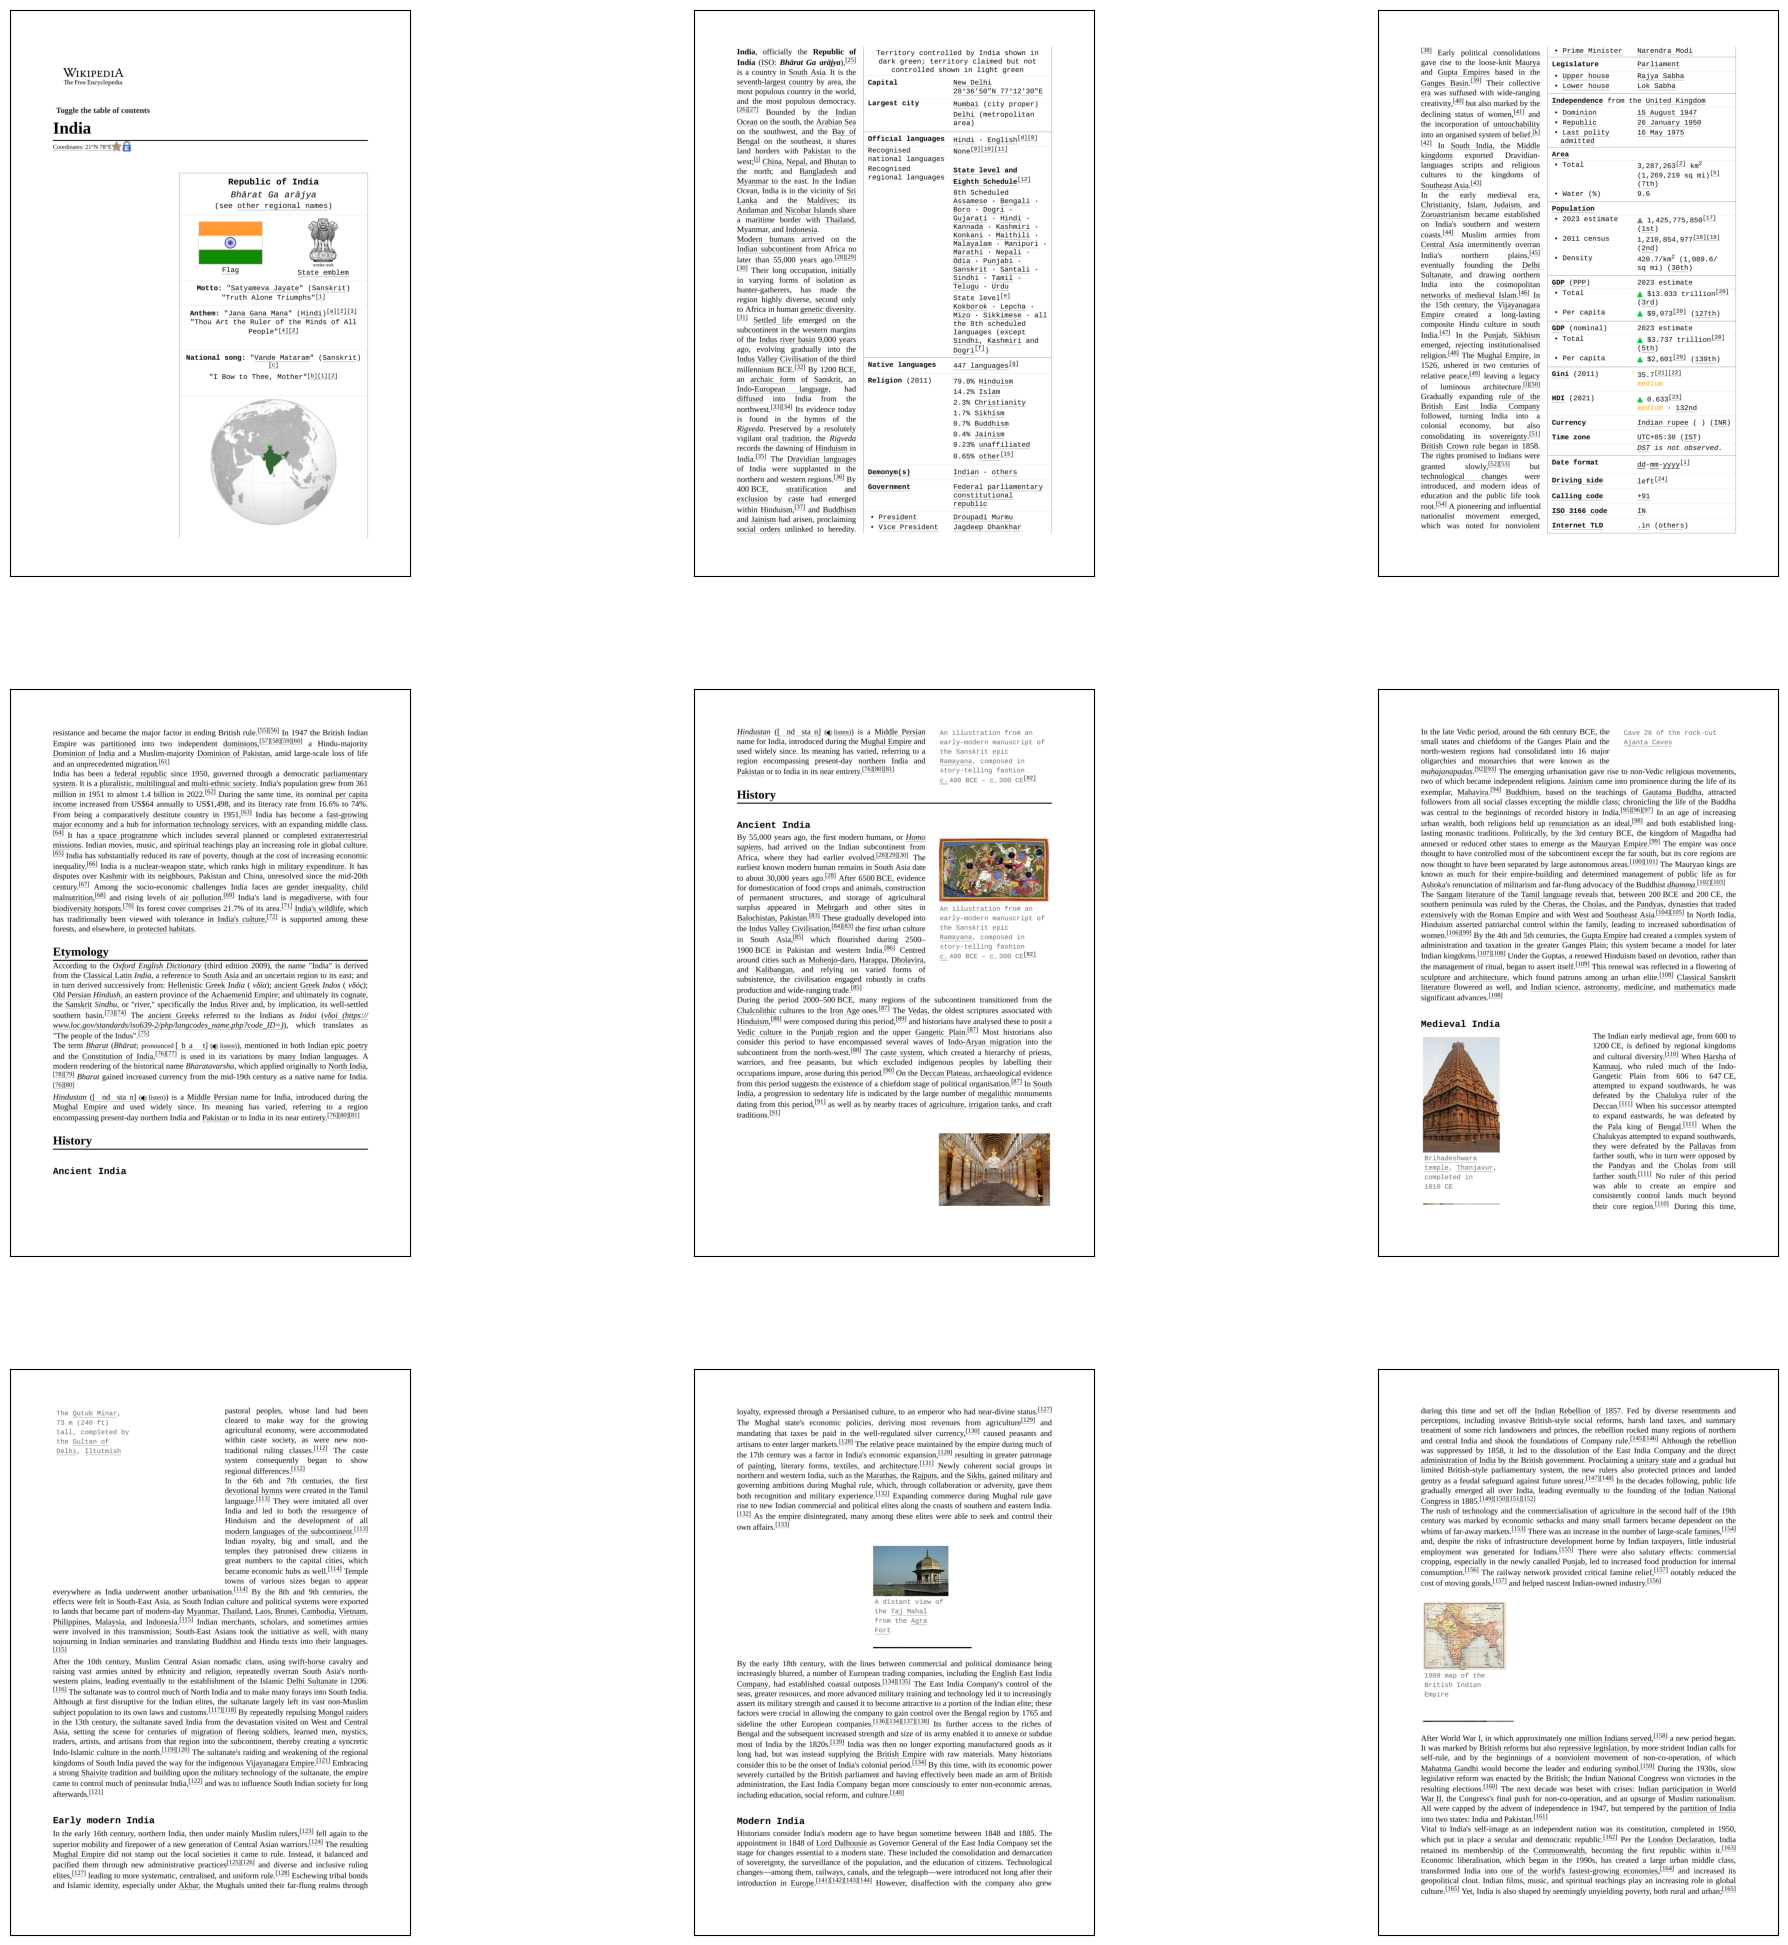

In [17]:
display_document("/content/pdf_dir")

In [18]:
model = vectorize_and_build_model("/content/pdf_dir")

In [19]:
question = "Describe indegenous people in India"
response = model.run(question)
print(response)

 Indigenous peoples in India include tribal and nomadic groups that have been living in India for generations. They have their own unique cultures, languages, religions, customs, and traditions. Many of these peoples are endangered due to displacement by development projects, and lack of access to resources and political representation.


In [20]:
question = "What is the population of India"
response = model.run(question)
print(response)

 According to the 2011 provisional census report, India has 1,210,193,422 residents.
